In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family = "gulim")
plt.rc('axes', unicode_minus = False)

In [20]:
# plt.plot([1, 2, 3, 4])
# plt.title('한글')
# plt.show()

In [21]:
titanic = sns.load_dataset("titanic")
print("titanic = \n", titanic.head())
print(titanic.info())

titanic = 
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived   

In [25]:
## missing
print("missing value = ")
print(titanic.isnull().sum())

missing value = 
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [28]:
titanic_df = titanic.loc[:, :"fare"]
titanic_df.info()

titanic_df.dropna(axis = 0, inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     714 non-null    int64  
 5   parch     714 non-null    int64  
 6   fare      714 non-null    float64
dtypes: float64(2), int64(4), ob

In [30]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


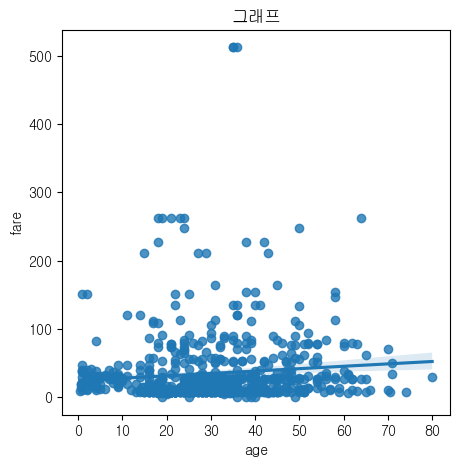

In [38]:
## sns.regplot
fig, ax = plt.subplots(figsize = (5, 5))
sns.regplot(titanic_df, x = "age", y = "fare")

plt.title('그래프')
plt.xlabel("age")
plt.ylabel("fare")
plt.show()

In [39]:
fig.savefig("titanic_reg.png")

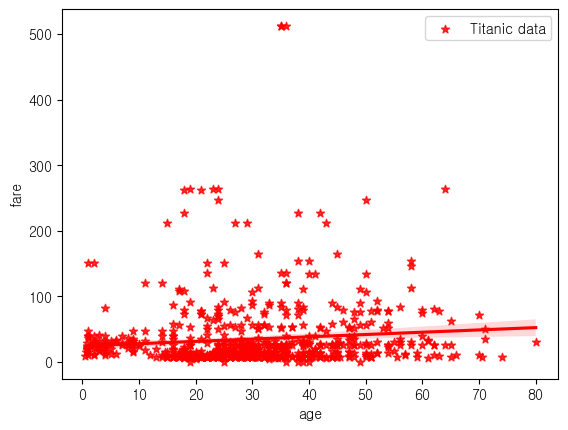

In [59]:
sns.regplot(titanic_df, x = "age", y = "fare", fit_reg=True, color = "r", marker = "*", order = 1, label = "Titanic data")
plt.legend(loc = 0)
plt.show()

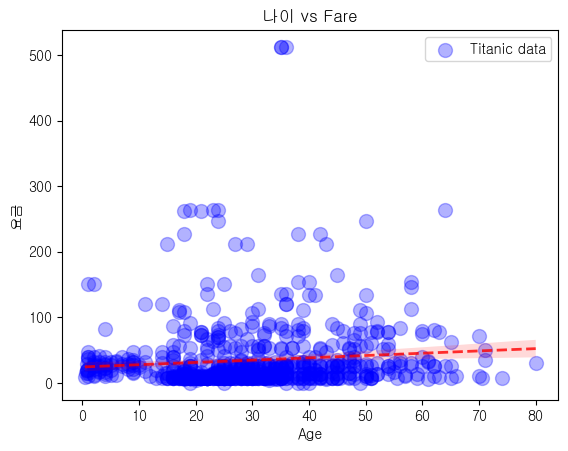

In [66]:
sns.regplot(titanic_df, x = "age"
            , y = "fare"
            , fit_reg=True
            , color = "r"
            , marker = "o"
            , order = 1
            , label = "Titanic data"
            , scatter_kws={'fc':'b', 'ec':'b', 's':100, 'alpha':0.3}
            , line_kws = {"lw":2, "ls": "--", "alpha":0.8})
plt.legend(loc = 0)

plt.title("나이 vs Fare")
plt.xlabel("Age")
plt.ylabel("요금")
plt.show()

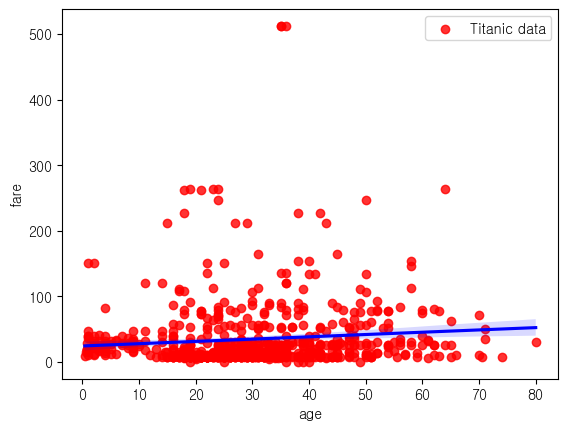

In [65]:
sns.regplot(data=titanic_df, x="age", y="fare", fit_reg=True, 
            line_kws={'color': 'blue'}, # 선 색상
            scatter_kws={'color': 'red', 'marker': '*'}, # 마커 색상 및 모양
            order=1, label="Titanic data")

plt.legend(loc=0)
plt.show()

In [71]:
## diamonds dataset
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Users\user\AppData\Local\Temp\ipykernel_2924\1194924651.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 0)


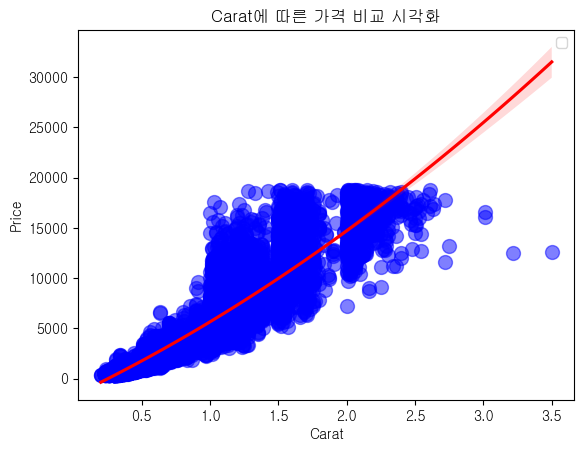

In [96]:
## quest
# cut = ideal => price vs carat (replot)
df_diamonds_filtered = diamonds[diamonds["cut"] == "Ideal"]

sns.regplot(df_diamonds_filtered
            , x = "carat"
            , y = "price"
            , order = 2
            , scatter_kws={"fc":"b"
                           , "ec":"b"
                           , "s":100
                           , "alpha": 0.5}
            , line_kws = {"color":"red"})

plt.legend(loc = 0)
plt.title("Carat에 따른 가격 비교 시각화")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

In [90]:
## sns slmplot
penguins = sns.load_dataset("penguins")
penguins.head()
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

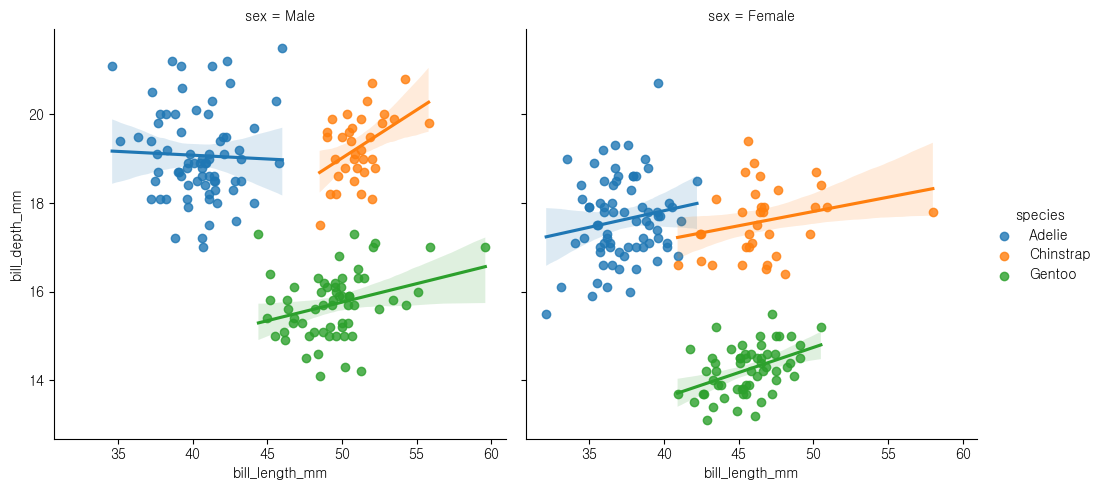

In [93]:
sns.lmplot(penguins
           , x = "bill_length_mm"
           , y = "bill_depth_mm"
           , hue = "species"
           , col = "sex")

plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


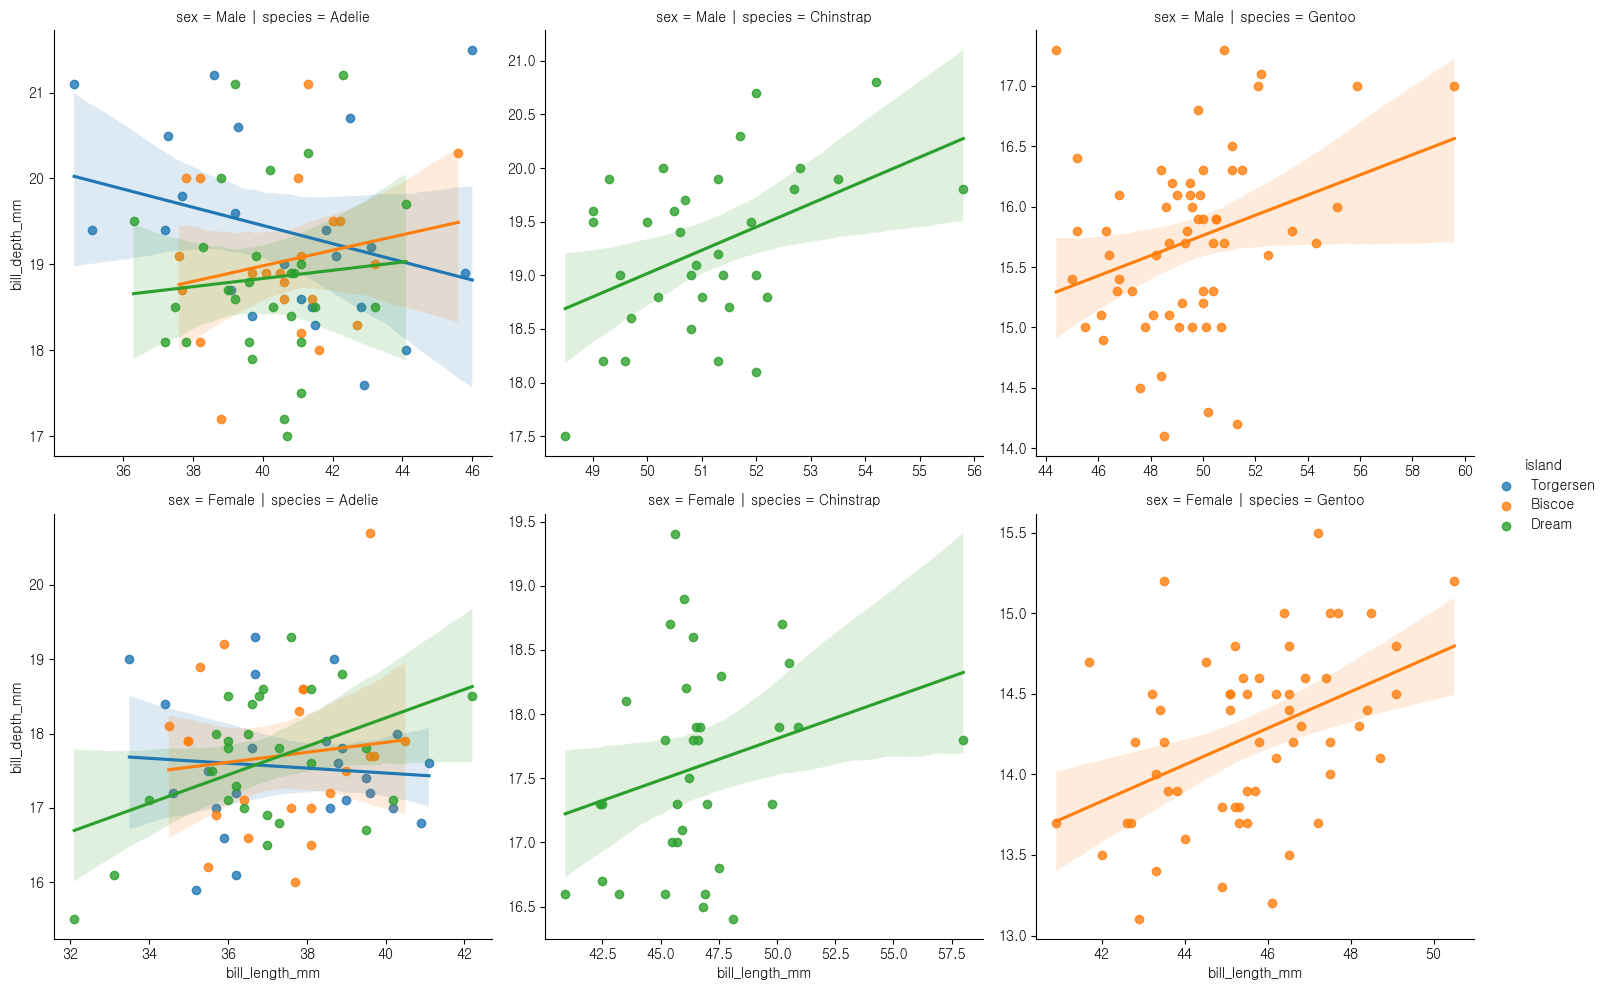

In [95]:
sns.lmplot(penguins
           , x = "bill_length_mm"
           , y = "bill_depth_mm"
           , col = "species"
           , row = "sex"
           , hue = "island"
           , sharex = False
           , sharey = False)

plt.show()

In [97]:
## diamonds dataset
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


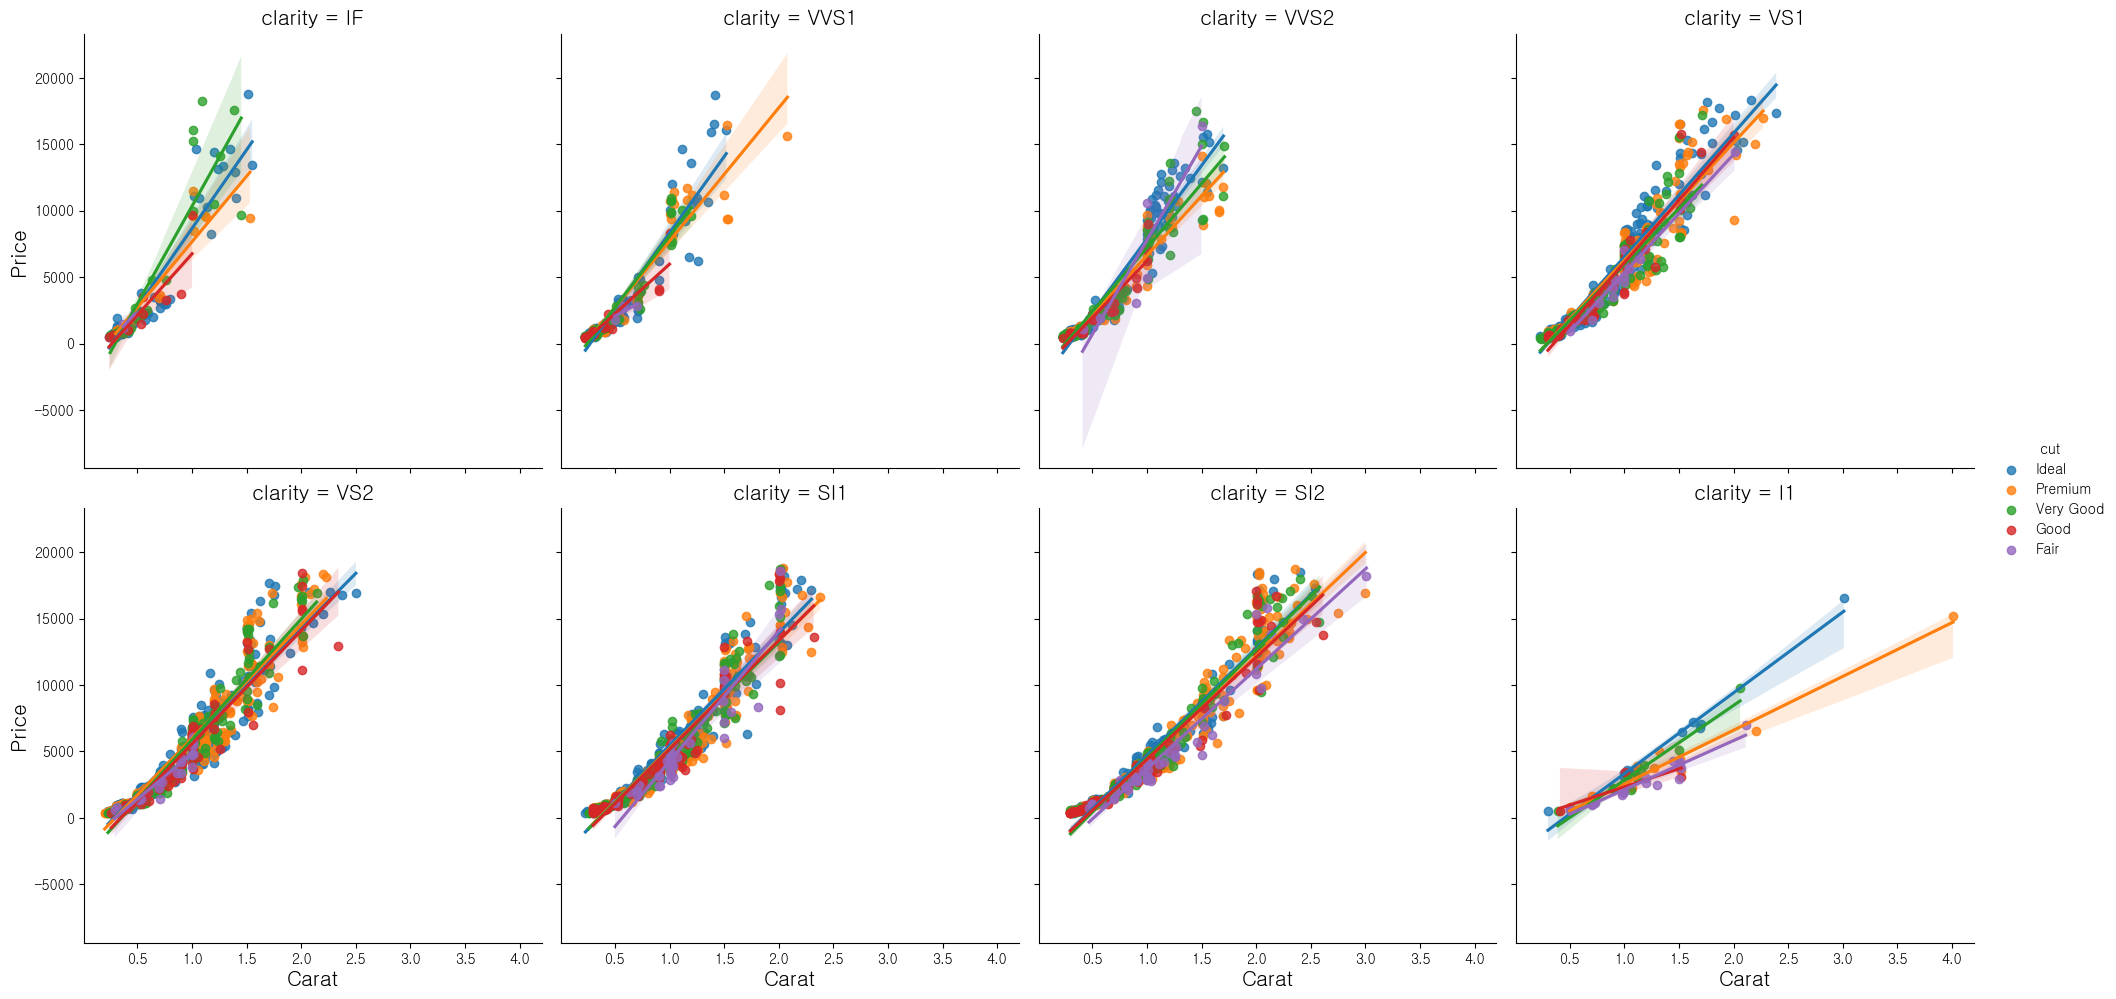

In [107]:
p = sns.lmplot(diamonds.sample(n = 5000)
           , x = "carat"
           , y = "price"
        #    , row = ""
           , col = "clarity"
           , hue = "cut"
           , col_wrap=4)

p.set_titles(size = 15)
p.set_xlabels("Carat", size = 15)
p.set_ylabels("Price", size = 15)

plt.show()

In [109]:
## sns.scatterplot
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [110]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [111]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

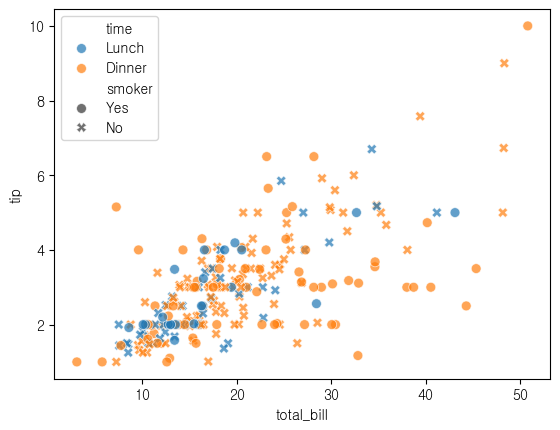

In [118]:
sns.scatterplot(tips
                , x = "total_bill"
                , y = "tip"
                , hue = "time"
                , style = "smoker"
                , s = 50
                , alpha = 0.7)

plt.legend()
plt.show()

In [119]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [128]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [141]:
color_idx = (diamonds["color"]  == "D") | (diamonds["color"]  == "E") | (diamonds["color"]  == "F")
cut_idx = (diamonds["cut"] == "Ideal") | (diamonds["cut"] == "Good") | (diamonds["cut"] == "Fair")
# print(color_idx)
# print(cut_idx)

final_idx = color_idx & cut_idx
# print(final_idx)

diamond_df = diamonds[final_idx].copy()

diamond_df['color'] = diamond_df['color'].cat.remove_unused_categories()
diamond_df['cut'] = diamond_df['cut'].cat.remove_unused_categories()
# diamonds_df.shape

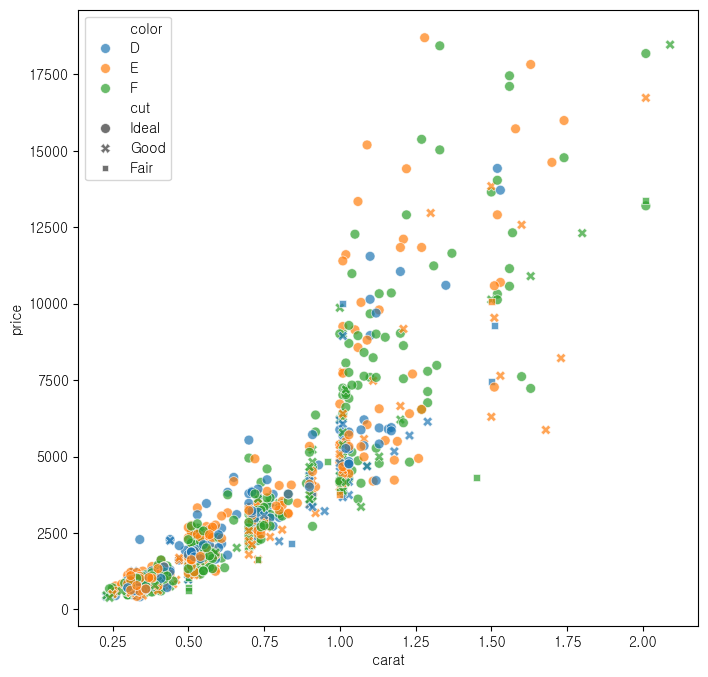

In [145]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.scatterplot(diamond_df.sample(n = 1000)
           , x = "carat"
           , y = "price"
           , hue = "color"
           , style = "cut"
           , s = 50
           , alpha = 0.7)

plt.legend()
plt.show()

In [146]:
## 이상형과 연속형
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


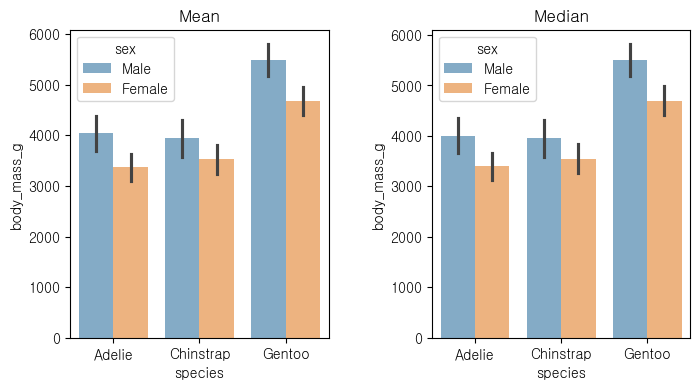

In [154]:
fig, axs = plt.subplots(1, 2, figsize = (8, 4))

sns.barplot(penguins
            , x = "species"
            , y = "body_mass_g"
            , estimator="mean"
            , hue = "sex"
            , alpha = 0.6
            , errorbar="sd"
            , ax = axs[0])
axs[0].set_title("Mean")

sns.barplot(penguins
            , x = "species"
            , y = "body_mass_g"
            , estimator="median"
            , hue = "sex"
            , alpha = 0.6
            , errorbar="sd"
            , ax = axs[1])
axs[1].set_title("Median")

plt.subplots_adjust(wspace=0.4)
plt.show()

In [157]:
## iris dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [167]:
y_list = iris.columns[:4]

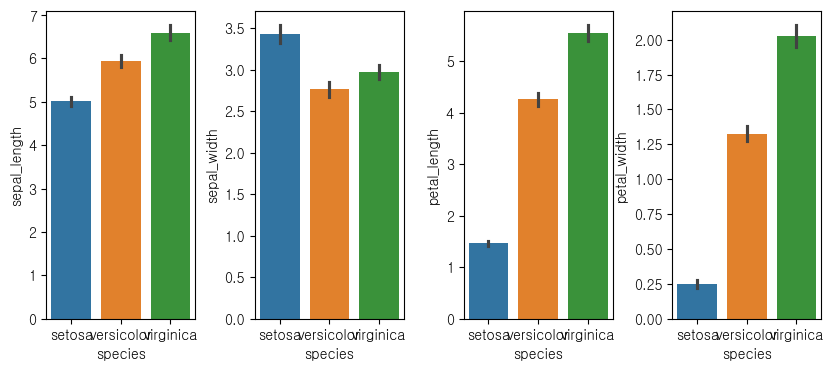

In [170]:
fig, axe = plt.subplots(1, 4, figsize = (10, 4))

for i in range(4):
    sns.barplot(iris, x = "species", y = y_list[i], hue = "species", ax = axe[i])
    
# sns.barplot(iris
#             , x = "species"
#             , y = "sepal_length"
#             , hue = "species"
#             , ax = axe[0])

# sns.barplot(iris
#             , x = "species"
#             , y = "sepal_width"
#             , hue = "species"
#             , ax = axe[1])

# sns.barplot(iris
#             , x = "species"
#             , y = "petal_length"
#             , hue = "species"
#             , ax = axe[2])

# sns.barplot(iris
#             , x = "species"
#             , y = "petal_width"
#             , hue = "species"
#             , ax = axe[3])

plt.subplots_adjust(wspace=0.4)
plt.show()

# quest

In [183]:
## mpg dataset
fpath = "../dataset"
fname = "mtcars.xlsx"
file = os.path.join(fpath, fname)

df = pd.read_excel(file)
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Result_1. Summary table by factor

In [195]:
# cyl 값이 4, 6, 8인 데이터만 필터링
df_filtered = df[df["cyl"].isin([4, 6, 8])]

# cyl의 mean과 std 구하기
mean_std_df_cyl = df_filtered.groupby('cyl')['mpg'].agg(['mean', 'std'])
mean_std_df_cyl

,mean,std
cyl,,
4,26.663636,4.509828
6,19.742857,1.453567
8,15.100000,2.560048


In [196]:
# am의 mean과 std 구하기
mean_std_df_am = df.groupby('am')['mpg'].agg(['mean', 'std'])
mean_std_df_am

,mean,std
am,,
0,17.147368,3.833966
1,24.392308,6.166504


In [197]:
# am의 mean과 std 구하기
mean_std_df_vs = df.groupby('vs')['mpg'].agg(['mean', 'std'])
mean_std_df_vs

,mean,std
vs,,
0,16.616667,3.860699
1,24.557143,5.378978


## Result_2. Five number summary table of mpg, wt

In [203]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [214]:
df[["mpg", "wt"]].describe()

,mpg,wt
count,32.000000,32.000000
mean,20.090625,3.217250
std,6.026948,0.978457
min,10.400000,1.513000
25%,15.425000,2.581250
50%,19.200000,3.325000
75%,22.800000,3.610000
max,33.900000,5.424000


## Result_3. Value counts of cyl vs am

In [220]:
df_filtered.groupby("am")["cyl"]

result3 = pd.crosstab(df_filtered['cyl'], df_filtered['am'])
result3

am,0,1
cyl,,
4,3,8
6,4,3
8,12,2


## Result_4. mpg to kpg(*1.61)

In [223]:
df["kpg"] = df["mpg"]*1.61
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kpg
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,33.810
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,33.810
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,36.708
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,34.454
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,30.107
